In [1]:
#
# File: Assignment06_2b.py
# Name: Christopher M. Anderson
# Date: 10/11/2020
# Course: DSC650 Big Data
# Week: 6
# Assignment Number: 6.2b

# Using section 5.2 in Deep Learning with Python
# as a guide, create a ConvNet model that classifies
# images CIFAR10 small images classification dataset.
# This time includes dropout and data-augmentation.
# Save the model, predictions, metrics, and validation
# plots in the dsc650/assignments/assignment06/results
# directory. If you are using JupyterHub, you can include
# those plots in your Jupyter notebook.

In [2]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [3]:
# ----------| USING CONVNET W/CIFAR10 DATA: W/DROPOUT, AUGMENTATION |----------


# Load CIFAR-10 data
(input_train, target_train), (input_test, target_test) = cifar10.load_data()

In [4]:
# Model configuration
batch_size = 50
img_width, img_height, img_num_channels = 32, 32, 3
loss_function = sparse_categorical_crossentropy
no_classes = 10
no_epochs = 30
optimizer = Adam()
validation_split = 0.2
verbosity = 1

In [5]:
# Determine shape of the data
input_shape = (img_width, img_height, img_num_channels)

In [6]:
# Parse numbers as floats
input_train = input_train.astype('float32')
input_test = input_test.astype('float32')

In [7]:
# Normalize data
input_train = input_train / 255
input_test = input_test / 255

In [8]:
# Create the model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.5))   # Adding Dropout
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(no_classes, activation='softmax'))

In [9]:
# Data augmentation
# create data generator
datagen = ImageDataGenerator(
	width_shift_range=0.1,
	height_shift_range=0.1,
	horizontal_flip=True)
# prepare iterator
it_train = datagen.flow(input_train, target_train, batch_size=64)

In [10]:
# Compile the model
model.compile(loss=loss_function,
              optimizer=optimizer,
              metrics=['accuracy'])

In [11]:
# Fit data to model
history = model.fit_generator(it_train,
	epochs=no_epochs,
	verbose=verbosity,
	validation_data=(input_test, target_test))

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
782/782 [==============================] - 34s 44ms/step - loss: 1.7387 - accuracy: 0.0899 - val_loss: 1.3563 - val_accuracy: 0.0811
Epoch 2/30
782/782 [==============================] - 34s 44ms/step - loss: 1.4122 - accuracy: 0.0918 - val_loss: 1.2022 - val_accuracy: 0.0676
Epoch 3/30
782/782 [==============================] - 34s 43ms/step - loss: 1.2940 - accuracy: 0.0931 - val_loss: 1.0723 - val_accuracy: 0.0770
Epoch 4/30
782/782 [==============================] - 34s 44ms/step - loss: 1.2115 - accuracy: 0.0957 - val_loss: 1.0496 - val_accuracy: 0.0755
Epoch 5/30
782/782 [==============================] - 34s 43ms/step - loss: 1.1503 - accuracy: 0.0980 - val_loss: 0.9945 - val_accuracy: 0.1222
Epoch 6/30
782/782 [==============================] - 34s 44ms/step - loss: 1.0965 - accuracy: 0.0983 - val_loss: 1.0076 - val_accuracy: 0.0688
Epoch 7/30
782/782 [==============================] - 34s 43

In [12]:
# Generate generalization metrics
score = model.evaluate(input_test, target_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 0.6946734189987183 / Test accuracy: 0.09709999710321426


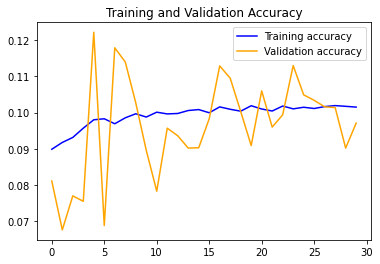

In [13]:
# plot accuracy
plt.title('Training and Validation Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='Training accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='Validation accuracy')
plt.legend()
plt.show()

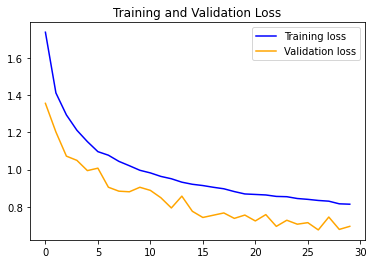

In [14]:
# plot loss
plt.title('Training and Validation Loss')
plt.plot(history.history['loss'], color='blue', label='Training loss')
plt.plot(history.history['val_loss'], color='orange', label='Validation loss')
plt.legend()
plt.show()